In [ ]:
import numpy as np
import utils
from collections import namedtuple
import cloud_dic 
import forwardmodel
from test_module import modelspec 
import settings

import matplotlib.pyplot as plt

In [13]:
samplemode = 'mcmc'
chemeq = 0
gaslist = ['h2o','co','co2','ch4','nh3','h2s','K','na']
gastype_list = ['U','U','U','U','U','U','U','U']
fwhm = 0
do_fudge = 0
ptype = 9
do_clouds = 0 
npatches = 1
cloudname = ['clear']
cloudpatch_index = [[1]]
particle_dis = []

wavelength_range = [1.0, 2.5]
ndata = 1

theta = [-3.27,-3.36,-7.27,-8.28,-4.73,-8.71,-5.36]+[4.89]+[1.50901046e-19]+[0.00258329]

In [14]:
instrument_instance = utils.Instrument(fwhm, wavelength_range, ndata)
model_config_instance = utils.ModelConfig(samplemode, do_fudge)
obspec = []

In [15]:
model_config_instance.xlist = 'data/gaslistR10K.dat'
model_config_instance.do_bff=0
model_config_instance.malk=0
model_config_instance.pfile='data/test_data/G570D_model_benchmark_PROFILE.dat'
model_config_instance.update_dictionary()

In [16]:
all_params,all_params_values =utils.get_all_parametres(re_params.dictionary)
params_master = namedtuple('params',all_params)
print(all_params)
print(model_config_instance.do_fudge)

['h2o', 'co', 'co2', 'ch4', 'nh3', 'h2s', 'K_Na', 'logg', 'r2d2', 'dlambda']
0


In [17]:
params_instance = params_master(*theta)
re_params = utils.Retrieval_params(samplemode, chemeq, gaslist, gastype_list, fwhm, do_fudge, ptype, do_clouds, npatches, cloudname, cloudpatch_index, particle_dis)

In [18]:
args_instance = utils.ArgsGen(re_params,model_config_instance,instrument_instance,obspec)
settings.init(args_instance)
args_instance=settings.runargs

In [19]:
shiftspec, cloud_phot_press,other_phot_press,cfunc=modelspec(params_instance,re_params,args_instance,gnostics=0)

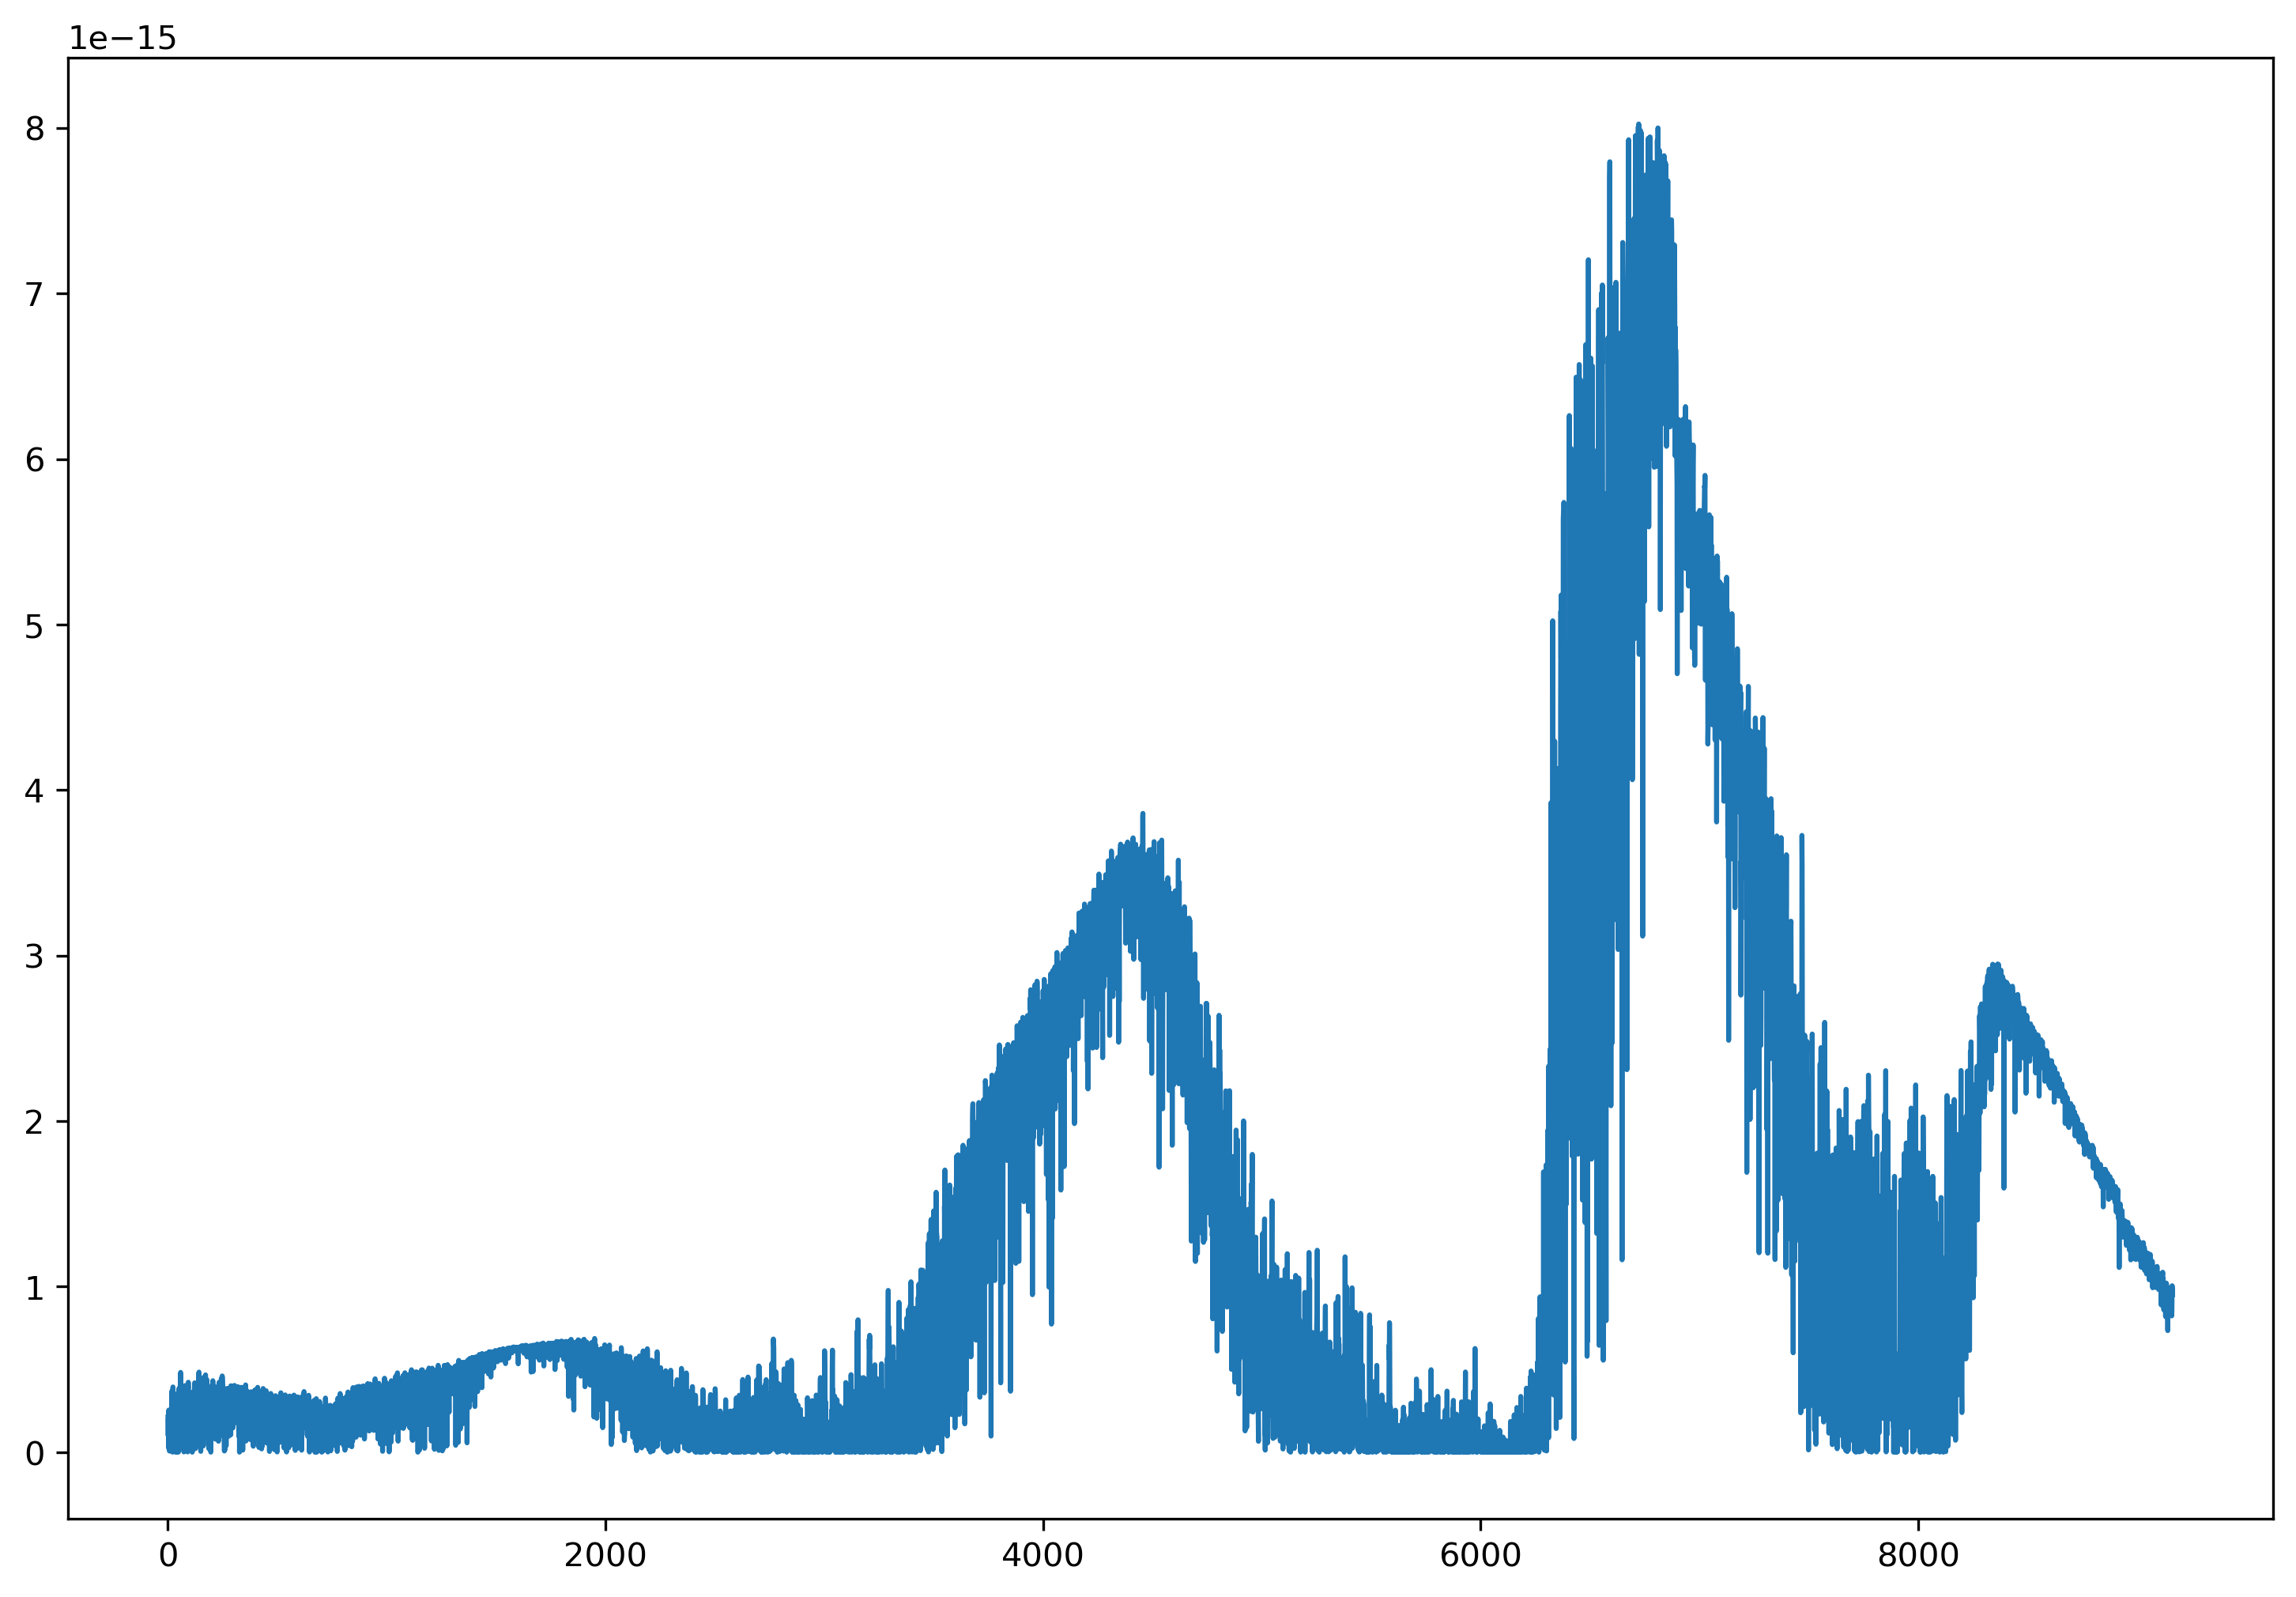

In [26]:
figure = plt.figure(figsize=(12,8), dpi=300)

plt.plot(shiftspec[1])
#plt.yscale('log')
plt.show()